# Car data loading

Set variables here:

In [1]:
# wav_file='Lubartow_EspaceTS_OctaviaAK_31032017_StAccDec/REC-0005_EspaceTS.WAV'

# #position in audiofile above
# pos_h=1
# pos_m=12
# pos_s=37

# #calendar time corresponding to the position above
# pos_time='2017-03-31 09:48:00'

# #duration of the audio file
# end_h=1
# end_m=12
# end_s=43

In [2]:
wav_file='Lubartow_EspaceTS_OctaviaAK_31032017_StAccDec/REC-0006_OctaviaAK.WAV'

#position in audiofile above
pos_h=0
pos_m=0
pos_s=39

#calendar time corresponding to the position above
pos_time='2017-03-31 09:49:00'

#duration of the audio file
end_h=1
end_m=22
end_s=29

Library imports

In [3]:
%pylab inline
import pandas as pd
import pytz
tz_loc=pytz.timezone('Europe/Warsaw')
from haversine import haversine
import datetime

Populating the interactive namespace from numpy and matplotlib


## Loading data from CSV

In [4]:
def read_track(path):
    x=pd.read_csv(path,sep=',',index_col=0,header=0,usecols=[0,2,3])
    x.index=pd.DatetimeIndex(pd.to_datetime(x.index,errors='coerce'),tz=tz_loc).tz_convert(pytz.utc)
    x[' Longitude']=pd.to_numeric(x[' Longitude'],errors='coerce')
    x[' Latitude']=pd.to_numeric(x[' Latitude'],errors='coerce')
    return x.dropna()

In [5]:
from os import listdir
tracks=[]
for f in listdir('.'):
    if f.endswith('.csv'):
        tr=read_track(f)
        tracks.append(tr)        
tr=pd.concat(tracks)
tr=tr.sort_index()

## Compute distance from mic

In [6]:
dist=[]
mic_loc=(22.59982821,51.44127906)
for i,p in tr.iterrows():
    loc=(p[0],p[1])
    dist.append(haversine(loc,mic_loc)*1000.0)
tr['Mic dist']=pd.Series(np.array(dist),index=tr.index)

### Find locations where dist is closest to mic

In [7]:
dist=tr['Mic dist'].values
dist-=dist.min()
dist/=dist.max()

m=(dist<0.1)*1.0
minima=[]
a=np.diff(m)
s=np.nonzero(a>0)[0][:-1]
e=np.nonzero(a<0)[0]
for beg,end in zip(s,e):
        minima.append(beg+np.argmin(dist[beg:end]))
pl_min=np.zeros(dist.shape).astype('bool')
pl_min[minima]=True
tr['Closest']=pd.Series(pl_min,index=tr.index)

### Plot locations on top of distance

In [8]:
tr.index.values.shape

(9163,)

(736419.4083333333, 736419.4152777778)

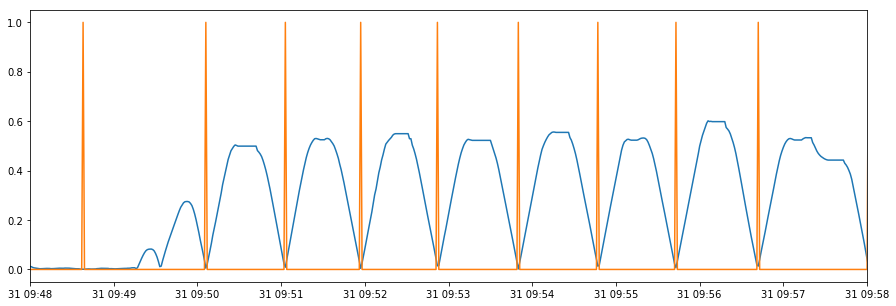

In [21]:
figure(figsize=(15,5))
plot(tr.index.values,dist)
plot(tr.index.values,pl_min)
xlim(datetime64('2017-03-31 09:48:00'),datetime64('2017-03-31 09:58:00'))

## Compute audiofile offset

In [10]:
atd=datetime64(pos_time)
zerotime=atd-timedelta64(pos_h*3600+pos_m*60+pos_s,'s')
a=tr.index.values-zerotime
tr['Audiofile position']=pd.Series(a,index=tr.index)
endtime=zerotime+timedelta64(end_h*3600+end_m*60+end_s+1,'s')

# Locations in audio where car is closest

In [11]:
sel=tr[zerotime:endtime]
sel[sel['Closest']==True]

,Longitude,Latitude,Mic dist,Closest,Audiofile position
GPS Time,,,,,
2017-03-31 09:48:38+00:00,22.599833,51.441283,0.000725,True,00:00:17
2017-03-31 09:50:06+00:00,22.599861,51.441253,0.005306,True,00:01:45
2017-03-31 09:51:03+00:00,22.599890,51.441244,0.009088,True,00:02:42
2017-03-31 09:51:57+00:00,22.599861,51.441270,0.004374,True,00:03:36
2017-03-31 09:52:52+00:00,22.599724,51.441233,0.014684,True,00:04:31
2017-03-31 09:53:50+00:00,22.599828,51.441296,0.002091,True,00:05:29
2017-03-31 09:54:47+00:00,22.599731,51.441248,0.013293,True,00:06:26
2017-03-31 09:55:43+00:00,22.599777,51.441296,0.007060,True,00:07:22
2017-03-31 09:56:42+00:00,22.599922,51.441230,0.013631,True,00:08:21


In [12]:
audiopositions=sel[sel['Closest']==True]['Audiofile position'].values

#the times above are in nanoseconds - use this method for conversion
def to_int_sec(td):
    return int(td/timedelta64(1,'s'))

# Load wave file

In [13]:
import wavio
from scipy.signal import hilbert

In [14]:
y=wavio.read(wav_file)

In [15]:
def load_wave(snd,point):    
    r=snd.rate
    start=(point-2)*r
    end=start+4*r
    res=snd.data[start:end,0]
    
    resH=hilbert(res)
    res=np.abs(resH)
    
    m=np.argmax(res)
    
    start=start+m-5*r
    end=start+10*r
        
    res=snd.data[start:end,:]
    
    return res[:,0],res[:,1]

## Sample extracted sample

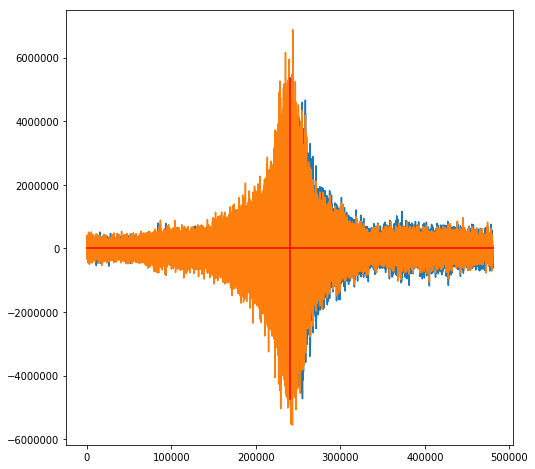

In [16]:
L,R=load_wave(y,to_int_sec(audiopositions[2]))
figure(figsize=(8,8))

plot(L)
plot(R)
mp=L.shape[0]//2
ymin=L.min()
ymax=L.max()

plot((mp,mp),(ymin,ymax),'r')
plot((0,2*mp),(0,0),'r')

## Extract all samples

In [17]:
snds=[]
for s in audiopositions:
    snds.append(load_wave(y,to_int_sec(s)))
snds=np.array(snds)
print 'Extracted {} signals with {} channels of {} samples'.format(snds.shape[0],snds.shape[1],snds.shape[2])

Extracted 72 signals with 2 channels of 480000 samples


### Draw all samples

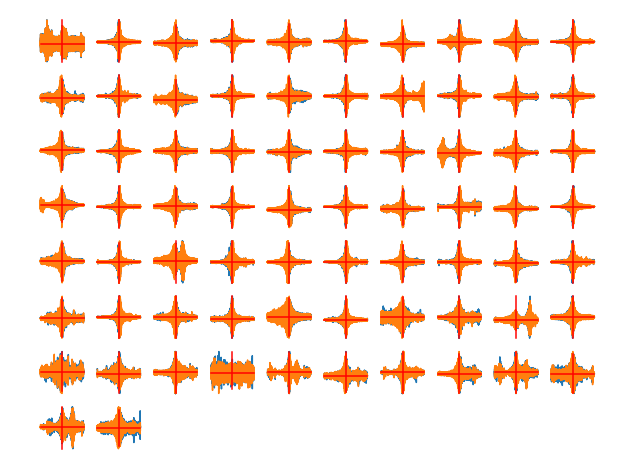

In [18]:
figure(figsize=(10,10))
ymin=-2^23
ymax=2^23-1
for s,snd in enumerate(snds):
    subplot(10,10,s+1)
    mp=snd.shape[1]//2
    ymin=snd[0].min()
    ymax=snd[0].max()
    plot(snd[0])
    plot(snd[1])
    plot((mp,mp),(ymin,ymax),'r')
    plot((0,2*mp),(0,0),'r')
#     title('{} [{}]'.format(s,secs[s]))
    axis('off')

# Save audio to files

In [19]:
%mkdir output

mkdir: cannot create directory ‘output’: File exists


In [23]:
for sec,snd in zip(audiopositions,snds):
    name='output/{}.wav'.format(to_int_sec(sec))
    wavio.write(name,snd.T,48000,sampwidth=3)
    print 'Saved  '+name

Saved  output/17.wav
Saved  output/105.wav
Saved  output/162.wav
Saved  output/216.wav
Saved  output/271.wav
Saved  output/329.wav
Saved  output/386.wav
Saved  output/442.wav
Saved  output/501.wav
Saved  output/580.wav
Saved  output/643.wav
Saved  output/698.wav
Saved  output/758.wav
Saved  output/810.wav
Saved  output/948.wav
Saved  output/1046.wav
Saved  output/1107.wav
Saved  output/1159.wav
Saved  output/1214.wav
Saved  output/1275.wav
Saved  output/1348.wav
Saved  output/1422.wav
Saved  output/1491.wav
Saved  output/1568.wav
Saved  output/1670.wav
Saved  output/1874.wav
Saved  output/1975.wav
Saved  output/2040.wav
Saved  output/2108.wav
Saved  output/2178.wav
Saved  output/2248.wav
Saved  output/2309.wav
Saved  output/2369.wav
Saved  output/2427.wav
Saved  output/2526.wav
Saved  output/2595.wav
Saved  output/2655.wav
Saved  output/2720.wav
Saved  output/2792.wav
Saved  output/2850.wav
Saved  output/2913.wav
Saved  output/2967.wav
Saved  output/3025.wav
Saved  output/3088.wav
Save